# 1 Housekeeping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 Load libraries

In [ ]:
!pip install dirty_cat

     |████████████████████████████████| 63 kB 1.3 MB/s 


In [ ]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from dirty_cat import SimilarityEncoder
from sklearn.preprocessing import normalize

In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

### 1.2 Load data

In [ ]:
#import data
train_labels = pd.read_csv('/content/drive/MyDrive/cs1/training_set_labels.csv')
train_values = pd.read_csv('/content/drive/MyDrive/cs1/training_Set_values.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])
test_values = pd.read_csv('/content/drive/MyDrive/cs1/test_set_value.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])


#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')
train.head()


,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,Lake Nyasa,Mnyusi B,Iringa,11,5.0,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,Lake Victoria,Nyamara,Mara,20,2.0,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,NaN,Pangani,Majengo,Manyara,21,4.0,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63.0,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,Lake Victoria,Kyanyamisa,Kagera,18,1.0,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
#concatenate train and test for data visualization
raw = pd.concat([train, test_values])
raw.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,Lake Nyasa,Mnyusi B,Iringa,11,5.0,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,Lake Victoria,Nyamara,Mara,20,2.0,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,NaN,Pangani,Majengo,Manyara,21,4.0,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63.0,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,Lake Victoria,Kyanyamisa,Kagera,18,1.0,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
test = test_values.copy()

### 1.3 Custom functions

In [ ]:


def plot_similarity(labels, features):
  
    normalized_features = normalize(features)
    
    # Create correction matrix
    corr = np.inner(normalized_features, normalized_features)
    
    # Plot
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(30,30)) 
    ax = sns.heatmap(corr, mask=mask, cmap= "RdYlGn", vmin=0, linewidths=1, annot=True, fmt=".2f", xticklabels=labels, annot_kws={"size": 9})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
    plt.show()


def encode_and_plot(labels):
  
    enc = SimilarityEncoder(similarity="ngram") # Encode
    X_enc = enc.fit_transform(labels.reshape(-1, 1))
    
    plot_similarity(labels, X_enc) # Plot

In [ ]:
def distribution_checker (data, xlabel):
  grouped = data.groupby([xlabel, 'status_group'])['id'].count().reset_index()
  pivot = grouped.pivot_table(index = xlabel, columns = 'status_group', fill_value = 0)
  mi=pivot.columns
  mi.tolist()
  ind = pd.Index([ str(e[1])  for e in mi.tolist()])
  pivot.columns = ind
  pivot['nr_pumps'] = pivot['functional'] +pivot['functional needs repair'] +pivot['non functional']
  pivot['all_pumps'] = pivot['nr_pumps'].sum()
  pivot['perc_total_pumps'] =((pivot['nr_pumps']/pivot['all_pumps'])*100).round(1)
  pivot['perc_functional'] = ((pivot['functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_non_functional'] = ((pivot['non functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_functional_needs_repair'] = ((pivot['functional needs repair']/pivot['nr_pumps'])*100).round(1)
  pivot = pivot.drop(['functional', 'functional needs repair', 'non functional', 'all_pumps'], axis=1)
  return(pivot)

# 2 Data cleaning

### 2.1 Missing data

In [ ]:
missing = round((raw.isna().sum())/len(raw)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

num_private          98.7
amount_tsh           70.1
scheme_name          47.5
population           36.1
construction_year    35.0
gps_height           34.5
status_group         20.0
installer             7.4
funder                7.4
scheme_management     6.5
public_meeting        5.6
permit                5.1
longitude             3.1
subvillage            0.6
payment_type          0.0
dtype: float64

We have 13 features (including the 'status_group') with missing data. I will not impute features that have >60% missing data or features that I will not use (e.g. scheme_name).


#### 2.1.1 longitude

* in mice imputation we did not use this feature we droped them because of high cardinality 
* It would be a 'waste' of accuracy so simply impute by the mean longitude of the region, because for some pumps we can surely get some more detail
* I will impute by the mean longitude of the subvillage if it is known, otherwise we move up to ward, lga and region

In [ ]:
# Train
#location related features
region = train.groupby(['region', 'lga', 'ward', 'subvillage'])['id'].sum().reset_index()
region.head(10)

,region,lga,ward,subvillage,id
0,Arusha,Arusha Rural,Bangata,Engikaleti,714672
1,Arusha,Arusha Rural,Bangata,Gwasei,69451
2,Arusha,Arusha Rural,Bangata,Kwaniche,142313
3,Arusha,Arusha Rural,Bangata,Lobolosi,51080
4,Arusha,Arusha Rural,Bangata,Ndukenyi,73715
5,Arusha,Arusha Rural,Bangata,Ngwasei,106565
6,Arusha,Arusha Rural,Bangata,Sanganani,81409
7,Arusha,Arusha Rural,Bangata,Sangananu,20484
8,Arusha,Arusha Rural,Bwawani,Buluga,4638
9,Arusha,Arusha Rural,Bwawani,Bwawani,138797


In [ ]:
#create mean longitude on the lowest granularity level (subvillage)
means_longitude_subvillage = train.groupby(['region', 'lga', 'ward', 'subvillage'])['longitude'].mean().reset_index()
means_longitude_subvillage = means_longitude_subvillage.rename(columns={"longitude": "longitude_imputed_subvillage"})

#ward level
means_longitude_ward = train.groupby(['region', 'lga', 'ward',])['longitude'].mean().reset_index()
means_longitude_ward = means_longitude_ward.rename(columns={"longitude": "longitude_imputed_ward"})

#lga level
means_longitude_lga = train.groupby(['region', 'lga'])['longitude'].mean().reset_index()
means_longitude_lga = means_longitude_lga .rename(columns={"longitude": "longitude_imputed_lga"})

#region level
means_longitude_region = train.groupby(['region'])['longitude'].mean().reset_index()
means_longitude_region = means_longitude_region.rename(columns={"longitude": "longitude_imputed_region"})
means_longitude_region.head()

,region,longitude_imputed_region
0,Arusha,36.552713
1,Dar es Salaam,39.215799
2,Dodoma,36.044171
3,Iringa,34.895989
4,Kagera,31.233262


train

In [ ]:
#merge the aggregated dataframes as new columns to the original df this will make it easier to replace missing values 
train= train.merge(means_longitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
train= train.merge(means_longitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
train = train.merge(means_longitude_lga, how = 'left', on = ['region', 'lga'])
train = train.merge(means_longitude_region, how = 'left', on = ['region'])

#select the right longitude level based on the availability of information
train['imputed_longitude'] = np.where(train['longitude'].isna(), train['longitude_imputed_subvillage'], train['longitude']) #if longitude is missing, impute it by the mean of the subvillage
train['imputed_longitude'] = np.where(train['imputed_longitude'].isna(), train['longitude_imputed_ward'], train['imputed_longitude']) #if subvillage mean is missing, impute it by the ward
train['imputed_longitude'] = np.where(train['imputed_longitude'].isna(), train['longitude_imputed_lga'], train['imputed_longitude'])
train['imputed_longitude'] = np.where(train['imputed_longitude'].isna(), train['longitude_imputed_region'], train['imputed_longitude'])



##test

In [ ]:
#merge the aggregated dataframes as new columns to the original df this will make it easier to replace missing values 
test= test.merge(means_longitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
test= test.merge(means_longitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
test = test.merge(means_longitude_lga, how = 'left', on = ['region', 'lga'])
test = test.merge(means_longitude_region, how = 'left', on = ['region'])

#select the right longitude level based on the availability of information
test['imputed_longitude'] = np.where(test['longitude'].isna(), test['longitude_imputed_subvillage'], test['longitude']) #if longitude is missing, impute it by the mean of the subvillage
test['imputed_longitude'] = np.where(test['imputed_longitude'].isna(), test['longitude_imputed_ward'], test['imputed_longitude']) #if subvillage mean is missing, impute it by the ward
test['imputed_longitude'] = np.where(test['imputed_longitude'].isna(), test['longitude_imputed_lga'], test['imputed_longitude'])
test['imputed_longitude'] = np.where(test['imputed_longitude'].isna(), test['longitude_imputed_region'], test['imputed_longitude'])



In [ ]:
#drop redundant columns
train= train.drop(['longitude_imputed_subvillage','longitude_imputed_ward' , 'longitude_imputed_lga' , 'longitude_imputed_region', 'longitude'], axis=1)

In [ ]:
#drop redundant columns
test= test.drop(['longitude_imputed_subvillage','longitude_imputed_ward' , 'longitude_imputed_lga' , 'longitude_imputed_region', 'longitude'], axis=1)


#### 2.1.2 Permit

In [ ]:
#Based on EDA I expect that the permit feature will not be an important predictor of waterpump functionality
# I can  impute by the mode (69% of the pumps have a permit),
# but I will use the mode of this features based on the 'public_meeting' and 'management_group' at first i used 'public_meeting' and 'scheme_name'based on parson co relation coeff
public_meeting = train.groupby(['public_meeting','management_group' ,'permit'])['id'].count().reset_index()
pivot = public_meeting.pivot(index = ['public_meeting', 'management_group', ], columns = 'permit')

mi=pivot .columns
mi.tolist()
ind = pd.Index([ str(e[1])  for e in mi.tolist()])
pivot .columns = ind

pivot['total_permit'] = pivot['False'] + pivot['True']
pivot['has permit'] = round((pivot['True'] /pivot['total_permit'])*100,1)
pivot

False   True  total_permit  has permit
public_meeting management_group                                        
False          commercial          239    535           774        69.1
               other                12    296           308        96.1
               parastatal          241    134           375        35.7
               unknown              28     57            85        67.1
               user-group         1860   1286          3146        40.9
True           commercial          508   1885          2393        78.8
               other               167    251           418        60.0
               parastatal          272    701           973        72.0
               unknown              44    148           192        77.1
               user-group        12856  31761         44617        71.2

In [ ]:
#impute by mode
permit_mg_mode= raw.groupby(['public_meeting', 'management_group'])['permit'].agg(pd.Series.mode).reset_index()
permit_mg_mode  = permit_mg_mode .rename(columns={"permit": "imputed_permit_mg"})
raw = raw.merge(permit_mg_mode, how = 'left', on = ['public_meeting', 'management_group'])

raw['imputed_permit'] = np.where(raw['permit'].isna(), raw['imputed_permit_mg'], raw['permit'])  #if permit is missing, replace it by the mode of public meeting - management group
raw['imputed_permit']  = np.where(raw['imputed_permit'] .isna(), raw['permit'].mode(), raw['imputed_permit'])  #if eitther public meeting or management group is missing, then use the mode of permit (True)

#drop original permit column
raw = raw.drop(['permit', 'imputed_permit_mg'], axis=1)


##train

In [ ]:
#impute by mode
permit_mg_mode= train.groupby(['public_meeting', 'management_group'])['permit'].agg(pd.Series.mode).reset_index()
permit_mg_mode  = permit_mg_mode .rename(columns={"permit": "imputed_permit_mg"})
train = train.merge(permit_mg_mode, how = 'left', on = ['public_meeting', 'management_group'])

train['imputed_permit'] = np.where(train['permit'].isna(), train['imputed_permit_mg'], train['permit'])  #if permit is missing, replace it by the mode of public meeting - management group
train['imputed_permit']  = np.where(train['imputed_permit'] .isna(), train['permit'].mode(), train['imputed_permit'])  #if eitther public meeting or management group is missing, then use the mode of permit (True)

#drop original permit column
train = train.drop(['permit', 'imputed_permit_mg'], axis=1)

##test

In [ ]:
#impute by mode
permit_mg_mode  = permit_mg_mode .rename(columns={"permit": "imputed_permit_mg"})
test = test.merge(permit_mg_mode, how = 'left', on = ['public_meeting', 'management_group'])

test['imputed_permit'] = np.where(test['permit'].isna(), test['imputed_permit_mg'], test['permit'])  #if permit is missing, replace it by the mode of public meeting - management group
test['imputed_permit']  = np.where(test['imputed_permit'] .isna(), test['permit'].mode(), test['imputed_permit'])  #if eitther public meeting or management group is missing, then use the mode of permit (True)

#drop original permit column
test = test.drop(['permit', 'imputed_permit_mg'], axis=1)



#### 2.1.3 Public Meeting

In [ ]:
#Over 90% of the pumps have a public meeting. I will therefore impute by the mode.
train['public_meeting']=train['public_meeting'].fillna(train['public_meeting'].mode()[0])

In [ ]:
#Over 90% of the pumps have a public meeting. I will therefore impute by the mode.
test['public_meeting']=test['public_meeting'].fillna(train['public_meeting'].mode()[0])


#### 2.1.4 Scheme management

In [ ]:
# I will  impute missing scheme management values by the mode of the management - scheme-management as there is a lot of overlap here
check = train.groupby([  'management_group', 'scheme_management' , 'management'])['id'].count().reset_index()
check = check.sort_values('management')
check.head(10)

,management_group,scheme_management,management,id
0,commercial,Company,company,674
21,commercial,WUG,company,4
19,commercial,WUA,company,1
15,commercial,VWC,company,2
7,commercial,Private operator,company,2
11,commercial,Trust,company,1
35,other,WUA,other,2
31,other,Private operator,other,4
33,other,VWC,other,49
36,other,WUG,other,15


In [ ]:
scheme_mode = train.groupby(['management'])['scheme_management'].agg(pd.Series.mode).reset_index()
scheme_mode = scheme_mode.rename(columns={"scheme_management": "imputed_scheme_management"})
scheme_mode 

,management,imputed_scheme_management
0,company,Company
1,other,Other
2,other - school,SWC
3,parastatal,Parastatal
4,private operator,Private operator
5,trust,Trust
6,unknown,VWC
7,vwc,VWC
8,water authority,Water authority
9,water board,Water Board


train

In [ ]:
#merge scheme_mode to original df and use it to replace missing values
train = train.merge(scheme_mode, how = 'left', on = [ 'management'])
train['imputed_scheme__management'] = np.where(train['scheme_management'].isna(), train['imputed_scheme_management'], train['scheme_management'])

#drop redundant columns
train= train.drop(['scheme_management', 'imputed_scheme_management'],axis=1)



test

In [ ]:
#merge scheme_mode to original df and use it to replace missing values
test = test.merge(scheme_mode, how = 'left', on = [ 'management'])
test['imputed_scheme__management'] = np.where(test['scheme_management'].isna(), test['imputed_scheme_management'], test['scheme_management'])

#drop redundant columns
test= test.drop(['scheme_management', 'imputed_scheme_management'],axis=1)





#### 2.1.5 Installer

In [ ]:
#I noticed a lot of variation in captialization, so I will first convert al entries to lowercase
train['installer'] = train['installer'].str.lower()

#plot top 10 installers
installer = train.groupby('installer')['id'].count().reset_index()
installer = installer.sort_values('id', ascending = False)
installer.head(10)

,installer,id
384,dwe,17405
510,government,1891
582,hesawa,1395
1445,rwe,1206
260,commu,1065
310,danida,1050
359,district council,961
799,kkkt,910
205,central government,763
1654,tcrs,707


In [ ]:
#I noticed a lot of variation in captialization, so I will first convert al entries to lowercase
test['installer'] = test['installer'].str.lower()


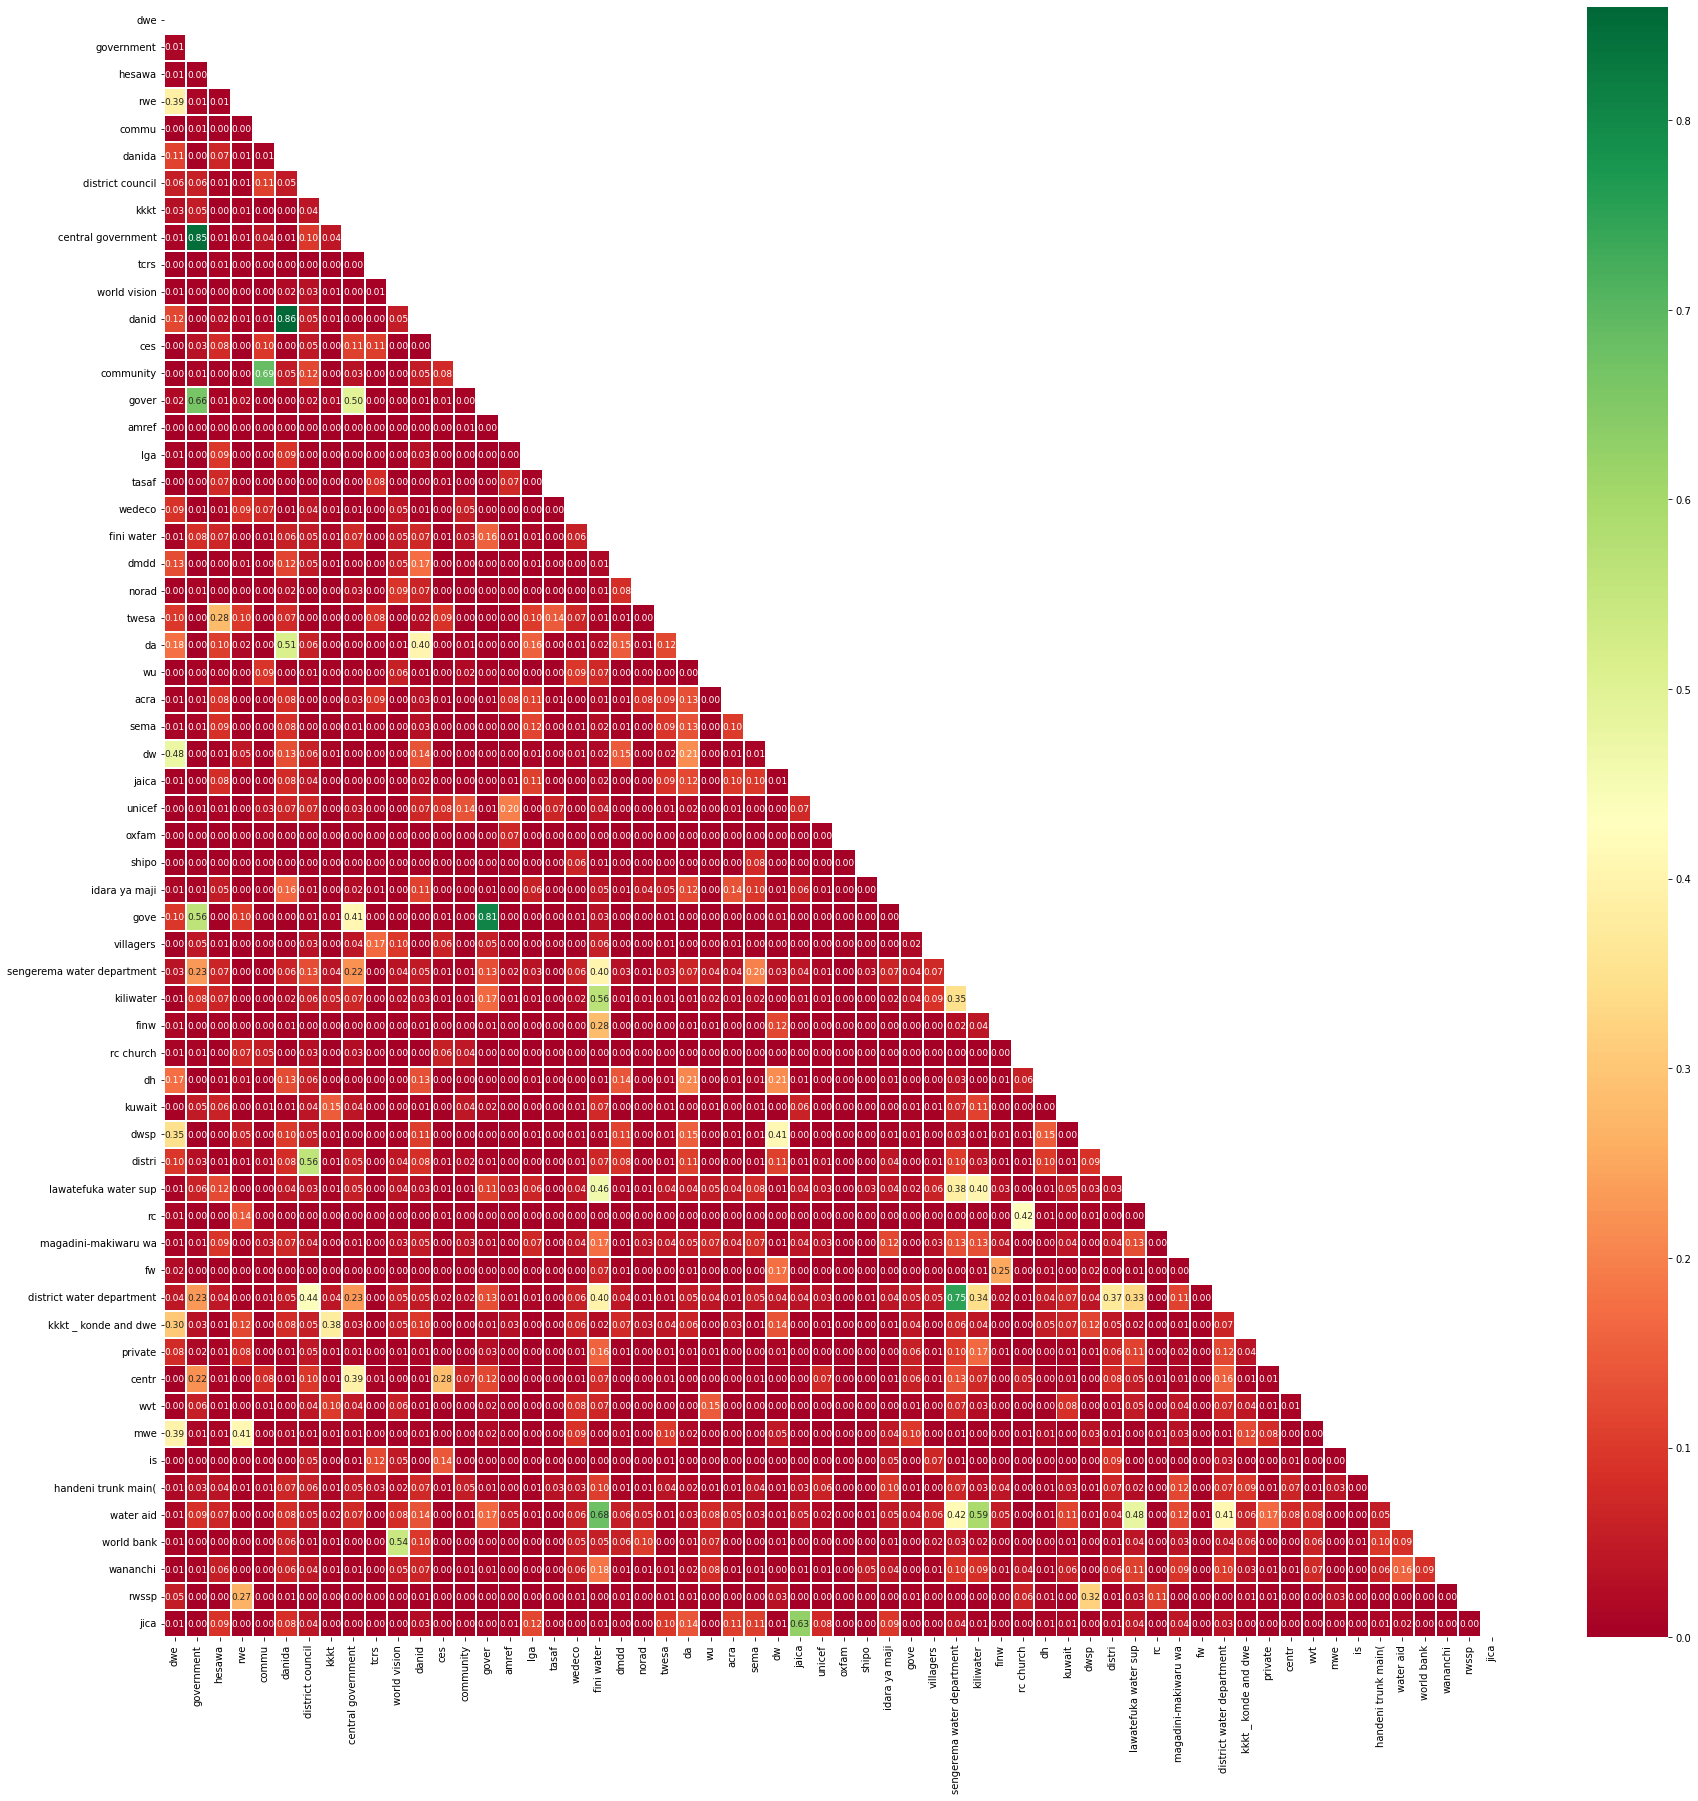

In [ ]:
#look at correlatoins in the names of top 60 installers
top_installers = installer.nlargest(60, 'id')['installer'].unique()
encode_and_plot(top_installers)

In [ ]:
#there are a few categories in the top 60 most common categories whose naims look a lot alike and are probably typo's. We will merge them together
train['installer'] = np.where( train['installer']=='gove', 'gover', train['installer'] )
train['installer'] = np.where( train['installer']=='community', 'commu', train['installer'] )
train['installer'] = np.where( train['installer']=='danid', 'danida', train['installer'] )

installer = train.groupby('installer')['id'].count().reset_index()
installer = installer.sort_values('id', ascending = False)
installer.head(10)

,installer,id
382,dwe,17405
507,government,1891
308,danida,1674
260,commu,1620
579,hesawa,1395
1442,rwe,1206
357,district council,961
796,kkkt,910
205,central government,763
502,gover,733


In [ ]:
#there are a few categories in the top 60 most common categories whose naims look a lot alike and are probably typo's. We will merge them together
test['installer'] = np.where( test['installer']=='gove', 'gover', test['installer'] )
test['installer'] = np.where( test['installer']=='community', 'commu', test['installer'] )
test['installer'] = np.where( test['installer']=='danid', 'danida', test['installer'] )


In [ ]:
#I want to keep the most frequent installers and combine the rarer classes together. I have played around with the optimum number of installers to keep, and I decided on the top 150.

#create list of top 150 installers
top_installers = installer.nlargest(150, 'id')['installer'].unique()

#replace funders that are not in top 10 with 'other'
raw['installer'] = np.where(raw['installer'].isin(top_installers), raw['installer'], 'other')


train

In [ ]:
#I want to keep the most frequent installers and combine the rarer classes together. I have played around with the optimum number of installers to keep, and I decided on the top 150.

#create list of top 150 installers
top_installers = installer.nlargest(150, 'id')['installer'].unique()

#replace funders that are not in top 10 with 'other'
train['installer'] = np.where(train['installer'].isin(top_installers), train['installer'], 'other')


test

In [ ]:
#I want to keep the most frequent installers and combine the rarer classes together. I have played around with the optimum number of installers to keep, and I decided on the top 150.

#create list of top 150 installers
top_installers = installer.nlargest(150, 'id')['installer'].unique()

#replace funders that are not in top 10 with 'other'
test['installer'] = np.where(test['installer'].isin(top_installers), test['installer'], 'other')


#### 2.1.6 Funder

In [ ]:
#set al entries to lowercase
train['funder'] = train['funder'].str.lower()


funder = train.groupby('funder')['id'].count().reset_index()
funder = funder.sort_values('id', ascending = False)
funder.head(10)


,funder,id
455,government of tanzania,9084
260,danida,3114
512,hesawa,2202
1415,rwssp,1374
1864,world bank,1349
726,kkkt,1287
1866,world vision,1246
1740,unicef,1057
1632,tasaf,876
301,district council,843


train

In [ ]:
#create list of top 150 funders (for mice imputed data i tried top 400 funders so for this i will try top 150 )
top_funders = funder.nlargest(150, 'id')['funder'].unique()

#replace funders that are not in top 150 with 'other'
train['funder'] = np.where(train['funder'].isin(top_funders), train['funder'], 'other')


test

In [ ]:
test['funder'] = test['funder'].str.lower()

#replace funders that are not in top 150 with 'other'
test['funder'] = np.where(test['funder'].isin(top_funders), test['funder'], 'other')


#### 2.1.7 Construction Year

In [ ]:
# because of the wide spread of construction years, I don't want to impude by the overall mean
# mice imputed  construction years had some problem because when i used this feature to make a new feature age some of the values where negative so mice is not a good option 

train['construction_year'].min(),  train['construction_year'].max() , train['construction_year'].mean()

(1960.0, 2013.0, 1996.8146855857951)

In [ ]:
# In eda we did bivariate analysis of extraction_type_group and construction_year 
# We can see that the mean construction year by extraction type group gives much more detailed information
mean_construction = train.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction 

,extraction_type_group,construction_year
0,afridev,2002.316821
1,gravity,1995.965949
2,india mark ii,2001.308428
3,india mark iii,2004.126984
4,mono,1992.634541
5,nira/tanira,1999.421166
6,other,1993.136859
7,other handpump,2000.711790
8,other motorpump,2011.666667
9,rope pump,2005.810256


train

In [ ]:
#create df with the mean extraction year by extraction type group
mean_construction = train.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction  = mean_construction .rename(columns={"construction_year": "imputed_construction_year"})

#merge this df to the main df and replace missing values
train = train.merge(mean_construction, how =  'left', on =  'extraction_type_group')
train['construction_year_imputed'] = np.where(train['construction_year'].isna(), train['imputed_construction_year'], train['construction_year'] )

#drop redundant columns
train=train.drop(['imputed_construction_year', 'construction_year'], axis=1)

test

In [ ]:
#create df with the mean extraction year by extraction type group
#mean_construction = test.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction  = mean_construction .rename(columns={"construction_year": "imputed_construction_year"})

#merge this df to the main df and replace missing values
test = test.merge(mean_construction, how =  'left', on =  'extraction_type_group')
test['construction_year_imputed'] = np.where(test['construction_year'].isna(), test['imputed_construction_year'], test['construction_year'] )

#drop redundant columns
test=test.drop(['imputed_construction_year', 'construction_year'], axis=1)

In [ ]:
mean_construction

,extraction_type_group,imputed_construction_year
0,afridev,2002.316821
1,gravity,1995.965949
2,india mark ii,2001.308428
3,india mark iii,2004.126984
4,mono,1992.634541
5,nira/tanira,1999.421166
6,other,1993.136859
7,other handpump,2000.711790
8,other motorpump,2011.666667
9,rope pump,2005.810256


#### 2.1.8 GPS height

Tanzania is not located below sealevel, so any negative value for gps height cannot be correct. The normal error is gps altitude is is +- 15 meter and this applies 95% of the time. The other 5% of the time you can have any value. HOwever, here we don't know if the gps height indicates the height of the water level, or the locaton of the well....  If I had known this for sure, I would clamp any negative values to zero. Around 2.5% of the records display a negative altitude. I will impute missing values based on the mean of the regional features 

In [ ]:
#create mean on the lowest granularity level (subvillage)
means_altitude_subvillage = train.groupby(['region', 'lga', 'ward', 'subvillage'])['gps_height'].mean().reset_index()#
means_altitude_subvillage = means_altitude_subvillage.rename(columns={"gps_height": "gps_height_imputed_subvillage"})

#ward level
means_altitude_ward = train.groupby(['region', 'lga', 'ward',])['gps_height'].mean().reset_index()
means_altitude_ward = means_altitude_ward.rename(columns={"gps_height": "gps_height_imputed_ward"})

#lga level
means_altitude_lga = train.groupby(['region', 'lga'])['gps_height'].mean().reset_index()
means_altitude_lga = means_altitude_lga .rename(columns={"gps_height": "gps_height_imputed_lga"})

#region level
means_altitude_region = train.groupby(['region'])['gps_height'].mean().reset_index()
means_altitude_region = means_altitude_region.rename(columns={"gps_height": "gps_height_imputed_region"})

#region basin
means_altitude_basin = train.groupby(['basin'])['gps_height'].mean().reset_index()
means_altitude_basin = means_altitude_basin.rename(columns={"gps_height": "gps_height_imputed_basin"})



##train

In [ ]:
#merge the aggregated dataframes as new columns to the original df
train= train.merge(means_altitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
train = train.merge(means_altitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
train = train.merge(means_altitude_lga, how = 'left', on = ['region', 'lga'])
train = train.merge(means_altitude_region, how = 'left', on = ['region'])
train = train.merge(means_altitude_basin, how = 'left', on = ['basin'])

#create final imputed longitude column
train['imputed_gps_height'] = np.where(train['gps_height'].isna(), train['gps_height_imputed_subvillage'], train['gps_height']) #if longitude is missing, impute it by the mean of the subvillage
train['imputed_gps_height'] = np.where(train['imputed_gps_height'].isna(), train['gps_height_imputed_ward'], train['imputed_gps_height']) #if subvillage mean is missing, impute it by the ward
train['imputed_gps_height'] = np.where(train['imputed_gps_height'].isna(), train['gps_height_imputed_lga'], train['imputed_gps_height'])
train['imputed_gps_height'] = np.where(train['imputed_gps_height'].isna(), train['gps_height_imputed_region'], train['imputed_gps_height'])
train['imputed_gps_height'] = np.where(train['imputed_gps_height'].isna(), train['gps_height_imputed_basin'], train['imputed_gps_height'])

#drop redundant columns
train= train.drop(['gps_height_imputed_subvillage','gps_height_imputed_ward' , 'gps_height_imputed_lga' , 'gps_height_imputed_region', 'gps_height', 'gps_height_imputed_basin'], axis=1)


##test

In [ ]:
#merge the aggregated dataframes as new columns to the original df
test= test.merge(means_altitude_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
test = test.merge(means_altitude_ward, how = 'left', on = ['region', 'lga', 'ward'])
test = test.merge(means_altitude_lga, how = 'left', on = ['region', 'lga'])
test = test.merge(means_altitude_region, how = 'left', on = ['region'])
test = test.merge(means_altitude_basin, how = 'left', on = ['basin'])

#create final imputed longitude column
test['imputed_gps_height'] = np.where(test['gps_height'].isna(), test['gps_height_imputed_subvillage'], test['gps_height']) #if longitude is missing, impute it by the mean of the subvillage
test['imputed_gps_height'] = np.where(test['imputed_gps_height'].isna(), test['gps_height_imputed_ward'], test['imputed_gps_height']) #if subvillage mean is missing, impute it by the ward
test['imputed_gps_height'] = np.where(test['imputed_gps_height'].isna(), test['gps_height_imputed_lga'], test['imputed_gps_height'])
test['imputed_gps_height'] = np.where(test['imputed_gps_height'].isna(), test['gps_height_imputed_region'], test['imputed_gps_height'])
test['imputed_gps_height'] = np.where(test['imputed_gps_height'].isna(), test['gps_height_imputed_basin'], test['imputed_gps_height'])

#drop redundant columns
test= test.drop(['gps_height_imputed_subvillage','gps_height_imputed_ward' , 'gps_height_imputed_lga' , 'gps_height_imputed_region', 'gps_height', 'gps_height_imputed_basin'], axis=1)


#### 2.1.9 Population

In [ ]:
#create mean on the lowest granularity level (subvillage)
means_population_subvillage = train.groupby(['region', 'lga', 'ward', 'subvillage'])['population'].mean().reset_index()#
means_population_subvillage = means_population_subvillage.rename(columns={"population": "population_imputed_subvillage"})

#ward level
means_population_ward = train.groupby(['region', 'lga', 'ward',])['population'].mean().reset_index()
means_population_ward = means_population_ward.rename(columns={"population": "population_imputed_ward"})

#lga level
means_population_lga = train.groupby(['region', 'lga'])['population'].mean().reset_index()
means_population_lga = means_population_lga .rename(columns={"population": "population_imputed_lga"})

#region level
means_population_region = train.groupby(['region'])['population'].mean().reset_index()
means_population_region = means_population_region.rename(columns={"population": "population_imputed_region"})

#region basin
means_population_basin = train.groupby(['basin'])['population'].mean().reset_index()
means_population_basin = means_population_basin.rename(columns={"population": "population_imputed_basin"})



##train

In [ ]:
#merge the aggregated dataframes as new columns to the original df
train= train.merge(means_population_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
train = train.merge(means_population_ward, how = 'left', on = ['region', 'lga', 'ward'])
train = train.merge(means_population_lga, how = 'left', on = ['region', 'lga'])
train = train.merge(means_population_region, how = 'left', on = ['region'])
train = train.merge(means_population_basin, how = 'left', on = ['basin'])

#create final imputed longitude column
train['imputed_population'] = np.where(train['population'].isna(), train['population_imputed_subvillage'], train['population']) #if longitude is missing, impute it by the mean of the subvillage
train['imputed_population'] = np.where(train['imputed_population'].isna(), train['population_imputed_ward'], train['imputed_population']) #if subvillage mean is missing, impute it by the ward
train['imputed_population'] = np.where(train['imputed_population'].isna(), train['population_imputed_lga'], train['imputed_population'])
train['imputed_population'] = np.where(train['imputed_population'].isna(), train['population_imputed_region'], train['imputed_population'])
train['imputed_population'] = np.where(train['imputed_population'].isna(), train['population_imputed_basin'], train['imputed_population'])

#drop redundant columns
train= train.drop(['population_imputed_subvillage','population_imputed_ward' , 'population_imputed_lga' , 'population_imputed_region', 'population', 'population_imputed_basin'], axis=1)

##test

In [ ]:
#merge the aggregated dataframes as new columns to the original df
test= test.merge(means_population_subvillage, how = 'left', on = ['region', 'lga', 'ward', 'subvillage'])
test = test.merge(means_population_ward, how = 'left', on = ['region', 'lga', 'ward'])
test = test.merge(means_population_lga, how = 'left', on = ['region', 'lga'])
test = test.merge(means_population_region, how = 'left', on = ['region'])
test = test.merge(means_population_basin, how = 'left', on = ['basin'])

#create final imputed longitude column
test['imputed_population'] = np.where(test['population'].isna(), test['population_imputed_subvillage'], test['population']) #if longitude is missing, impute it by the mean of the subvillage
test['imputed_population'] = np.where(test['imputed_population'].isna(), test['population_imputed_ward'], test['imputed_population']) #if subvillage mean is missing, impute it by the ward
test['imputed_population'] = np.where(test['imputed_population'].isna(), test['population_imputed_lga'], test['imputed_population'])
test['imputed_population'] = np.where(test['imputed_population'].isna(), test['population_imputed_region'], test['imputed_population'])
test['imputed_population'] = np.where(test['imputed_population'].isna(), test['population_imputed_basin'], test['imputed_population'])

#drop redundant columns
test= test.drop(['population_imputed_subvillage','population_imputed_ward' , 'population_imputed_lga' , 'population_imputed_region', 'population', 'population_imputed_basin'], axis=1)

### 2.2 Data types 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59398
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          59399 non-null  int64         
 1   status_group                59399 non-null  object        
 2   amount_tsh                  17761 non-null  float64       
 3   date_recorded               59399 non-null  datetime64[ns]
 4   funder                      59399 non-null  object        
 5   installer                   59399 non-null  object        
 6   latitude                    59399 non-null  float64       
 7   wpt_name                    59399 non-null  object        
 8   num_private                 757 non-null    float64       
 9   basin                       59399 non-null  object        
 10  subvillage                  59028 non-null  object        
 11  region                      59399 non-null  object    

In [ ]:
#change type to categorical

train['num_private' ] = train['num_private' ].astype('str')
train['region_code'] = train['region_code'].astype('str')
train['district_code'] = train['district_code'].astype('str')
train['num_private'] = train['num_private'].astype('str')

In [ ]:
#change type to categorical

test['num_private' ] = test['num_private' ].astype('str')
test['region_code'] = test['region_code'].astype('str')
test['district_code'] = test['district_code'].astype('str')
test['num_private'] = test['num_private'].astype('str')

In [ ]:
#replace string to integer
train['public_meeting'] = train['public_meeting'].replace({True: 1, False: 0})
train['imputed_permit'] = train['imputed_permit'].replace({True: 1, False: 0})


#change to integer
train[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']] = train[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']].astype('int')

#change type to categorical

#remove decimal
train['district_code'] = train['district_code'].str.split(".").str[0]


In [ ]:
#replace string to integer
test['public_meeting'] = test['public_meeting'].replace({True: 1, False: 0})
test['imputed_permit'] = test['imputed_permit'].replace({True: 1, False: 0})


#change to integer
test[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']] = test[['imputed_gps_height', 'construction_year_imputed', 'imputed_population']].astype('int')

#change type to categorical

#remove decimal
test['district_code'] = test['district_code'].str.split(".").str[0]


In [ ]:
#save cleaned df
train= train.rename(columns={"imputed_permit": "permit", "imputed_scheme__management": "scheme_management",
                    "imputed_gps_height": "gps_height", 'construction_year_imputed': 'construction_year', 
                   'imputed_population': 'population', 'imputed_longitude': 'longitude'}, errors="raise")

train.to_csv("/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/cleaned_train_set.csv")

In [ ]:
#save cleaned df
test= test.rename(columns={"imputed_permit": "permit", "imputed_scheme__management": "scheme_management",
                    "imputed_gps_height": "gps_height", 'construction_year_imputed': 'construction_year', 
                   'imputed_population': 'population', 'imputed_longitude': 'longitude'}, errors="raise")

test.to_csv("/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/cleaned_test_set.csv")

# 3 Feature engineering

In [ ]:
final_df_train = train.copy()
final_df_test = test.copy()

#### 3.1 Age

In [ ]:
#create age feature
final_df_train['recorded_year'] = pd.DatetimeIndex(final_df_train ['date_recorded']).year
final_df_train[ 'age'] = final_df_train['recorded_year'] - final_df_train['construction_year']
final_df_train = final_df_train.drop('recorded_year',axis=1)

In [ ]:
#create age feature
final_df_test['recorded_year'] = pd.DatetimeIndex(final_df_test ['date_recorded']).year
final_df_test[ 'age'] = final_df_test['recorded_year'] - final_df_test['construction_year']
final_df_test = final_df_test.drop('recorded_year',axis=1)

#### 3.2 Season

In [ ]:
final_df_train['month'] = pd.DatetimeIndex(final_df_train['date_recorded']).month

# season encoder based on reports by water aid tanzania and https://tanzania-specialist.com/best-time-to-visit-tanzania/
season_mapper = {1: 'short dry',2:'short dry', 3: 'long rain', 4: 'long rain', 5: 'long rain',6: 'long dry', 
                 7: 'long dry', 8: 'long dry', 9: 'long dry', 10: 'long dry', 11:'short rain', 12:'short rain'}
#.p feature values to scale
final_df_train['season']=final_df_train['month'].replace(season_mapper)
final_df_train=final_df_train.drop('month', axis=1)


In [ ]:
distribution_checker(final_df_train, 'season')
# here we can see status_group varies in different seasons as expected

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
season,,,,,
long dry,16432,27.7,51.5,41.6,6.9
long rain,22242,37.4,59.8,34.1,6.1
short dry,18756,31.6,50.4,40.3,9.3
short rain,1969,3.3,52.4,43.0,4.6


In [ ]:
final_df_test['month'] = pd.DatetimeIndex(final_df_test['date_recorded']).month

# season encoder based on reports by water aid tanzania and https://tanzania-specialist.com/best-time-to-visit-tanzania/
season_mapper = {1: 'short dry',2:'short dry', 3: 'long rain', 4: 'long rain', 5: 'long rain',6: 'long dry', 
                 7: 'long dry', 8: 'long dry', 9: 'long dry', 10: 'long dry', 11:'short rain', 12:'short rain'}
#.p feature values to scale
final_df_test['season']=final_df_test['month'].replace(season_mapper)
final_df_test=final_df_test.drop('month', axis=1)


#### 3.3 Amount tsh missing

In [ ]:
#where amount tsh isn't missing, the percentage of functional pumps is a lot higher
final_df_train['amount_tsh_missing'] = np.where( final_df_train['amount_tsh'].isna(), 1, 0)
distribution_checker(final_df_train, 'amount_tsh_missing')

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
amount_tsh_missing,,,,,
0,17761,29.9,70.7,22.2,7.1
1,41638,70.1,47.3,45.4,7.3


In [ ]:
#where amount tsh isn't missing, the percentage of functional pumps is a lot higher
final_df_test['amount_tsh_missing'] = np.where( final_df_test['amount_tsh'].isna(), 1, 0)

#### 3.4 Region district

In [ ]:
final_df['region_district'] = final_df['region']+ "-" + final_df['district_code']
region_district = distribution_checker(final_df,  'region_district')
region_district.head()

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
region_district,,,,,
Arusha-1,189,0.3,50.3,33.9,15.9
Arusha-2,1206,2.0,69.6,26.6,3.8
Arusha-3,109,0.2,71.6,20.2,8.3
Arusha-30,326,0.5,96.9,2.8,0.3
Arusha-5,201,0.3,54.2,31.8,13.9


In [ ]:
final_df_train['region_district'] = final_df_train['region']+ "-" + final_df_train['district_code']
region_district = distribution_checker(final_df_train,  'region_district')
region_district.head()

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
region_district,,,,,
Arusha-1,189,0.3,50.3,33.9,15.9
Arusha-2,1206,2.0,69.6,26.6,3.8
Arusha-3,109,0.2,71.6,20.2,8.3
Arusha-30,326,0.5,96.9,2.8,0.3
Arusha-5,201,0.3,54.2,31.8,13.9


In [ ]:
final_df_test['region_district'] = final_df_test['region']+ "-" + final_df_test['district_code']

final_df_test['region_district'].head()

0    Manyara-3
1     Arusha-2
2    Singida-2
3     Lindi-43
4     Ruvuma-3
Name: region_district, dtype: object


#### 3.5 Coordinates

In [ ]:
#two decimal places is 1.1 km accurate. This will provide enough information on the location. Using the full coordinate doesn't provide a lot of general information, but does result in high cardinality
final_df_train['longitude'] = round(final_df_train['longitude'], 2)
final_df_train['latitude'] = round(final_df_train['latitude'],2)

In [ ]:
#two decimal places is 1.1 km accurate. This will provide enough information on the location. Using the full coordinate doesn't provide a lot of general information, but does result in high cardinality
final_df_test['longitude'] = round(final_df_test['longitude'], 2)
final_df_test['latitude'] = round(final_df_test['latitude'],2)

#### 3.6 Extraction

In [ ]:
final_df_train.groupby([  'extraction_type_class', 'extraction_type_group', 'extraction_type'])['id'].count().reset_index()

,extraction_type_class,extraction_type_group,extraction_type,id
0,gravity,gravity,gravity,26780
1,handpump,afridev,afridev,1769
2,handpump,india mark ii,india mark ii,2400
3,handpump,india mark iii,india mark iii,98
4,handpump,nira/tanira,nira/tanira,8154
5,handpump,other handpump,other - mkulima/shinyanga,2
6,handpump,other handpump,other - play pump,85
7,handpump,other handpump,other - swn 81,229
8,handpump,other handpump,walimi,48
9,handpump,swn 80,swn 80,3670


In [ ]:
#i want to keep extraction type class and I will group the extraction type group en type together

#swn 80 and swn 81 become swn
#cemo + climax become other motorpump
# other -mkulima, other -play and walimi become other handpump

swn = ['other - swn 81', 'swn80']
final_df_train['extraction_type'] =np.where(final_df_train['extraction_type'].isin(swn), 'swn',  final_df_train['extraction_type'])

other_handpump = ['other - mkulima/shinyanga', 'other - play pump', 'other - walimi']
final_df_train['extraction_type']=np.where(final_df_train['extraction_type'].isin(other_handpump), 'other handpump',  final_df_train['extraction_type'])

other_motorpump = ['cemo', 'climax']
final_df_train['extraction_type'] =np.where(final_df_train['extraction_type'].isin(other_motorpump), 'other motorpump',  final_df_train['extraction_type'])


In [ ]:
#i want to keep extraction type class and I will group the extraction type group en type together

#swn 80 and swn 81 become swn
#cemo + climax become other motorpump
# other -mkulima, other -play and walimi become other handpump

swn = ['other - swn 81', 'swn80']
final_df_test['extraction_type'] =np.where(final_df_test['extraction_type'].isin(swn), 'swn',  final_df_test['extraction_type'])

other_handpump = ['other - mkulima/shinyanga', 'other - play pump', 'other - walimi']
final_df_test['extraction_type']=np.where(final_df_test['extraction_type'].isin(other_handpump), 'other handpump',  final_df_test['extraction_type'])

other_motorpump = ['cemo', 'climax']
final_df_test['extraction_type'] =np.where(final_df_test['extraction_type'].isin(other_motorpump), 'other motorpump',  final_df_test['extraction_type'])



#### 3.7 autonomy

In [ ]:
#based on reports by water aid
#non autonomous = government, VWC, town council ..... also water authority, parastatal (=state company) SWC
#autonomous = WUA, WUG, board, trust, school
#private = private, company

non = ['VWC', 'Water authority', 'Parastatal', 'SWC']
autonomous = ['WUG', 'WUA', 'Water Board', 'Trust']
private = ['Company', 'Private operator']
other = ['None', 'Other']

final_df_train['authority_scheme'] = final_df_train['scheme_management']
final_df_train.loc[final_df_train['authority_scheme'].isin(non),'authority_scheme']='non-autonomous'
final_df_train.loc[final_df_train['authority_scheme'].isin(autonomous ),'authority_scheme']='autonomous'
final_df_train.loc[final_df_train['authority_scheme'].isin(private),'authority_scheme']='private'
final_df_train.loc[final_df_train['authority_scheme'].isin(other ),'authority_scheme']='other'

In [ ]:
#based on reports by water aid
#non autonomous = government, VWC, town council ..... also water authority, parastatal (=state company) SWC
#autonomous = WUA, WUG, board, trust, school
#private = private, company

non = ['VWC', 'Water authority', 'Parastatal', 'SWC']
autonomous = ['WUG', 'WUA', 'Water Board', 'Trust']
private = ['Company', 'Private operator']
other = ['None', 'Other']

final_df_test['authority_scheme'] = final_df_test['scheme_management']
final_df_test.loc[final_df_test['authority_scheme'].isin(non),'authority_scheme']='non-autonomous'
final_df_test.loc[final_df_test['authority_scheme'].isin(autonomous ),'authority_scheme']='autonomous'
final_df_test.loc[final_df_test['authority_scheme'].isin(private),'authority_scheme']='private'
final_df_test.loc[final_df_test['authority_scheme'].isin(other ),'authority_scheme']='other'

In [ ]:
autonomy = distribution_checker(final_df_train, 'authority_scheme')
autonomy= autonomy.sort_values('nr_pumps', ascending= False)
autonomy

,nr_pumps,perc_total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
authority_scheme,,,,,
non-autonomous,44653,75.2,51.2,41.7,7.1
autonomous,11549,19.4,64.6,26.5,8.9
private,2244,3.8,60.1,37.1,2.8
other,953,1.6,61.5,34.6,3.9


#### 3.8 source type

In [ ]:
#source type by source class
final_df_train.groupby([  'source_class', 'source_type','source' ])['id'].count().reset_index()

In [ ]:
#keep source, but the rare classes will be put together
other = ['other',  'unknown']
final_df_train['source'] = np.where(final_df_train['source']=='unknown', 'other', final_df_train['source'])

In [ ]:
#keep source, but the rare classes will be put together
other = ['other',  'unknown']
final_df_test['source'] = np.where(final_df_test['source']=='unknown', 'other', final_df_test['source'])

#### 3.9 Drop redundant features

In [ ]:
#during EDA I already decided what features to keep and which ones to drop
final_df_train = final_df_train.drop(['amount_tsh', 'date_recorded', 'wpt_name', 'num_private', 'subvillage', 'region',  'district_code', 'lga', 'ward', 'recorded_by', 'scheme_name', 'extraction_type_group', 'management', 'management_group', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type', 'waterpoint_type_group', 'construction_year'], axis=1)
final_df_train.head()

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,69572,functional,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,...,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,8776,functional,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,...,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,34310,functional,other,world vision,-3.82,Pangani,21,1,gravity,gravity,...,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,67743,non functional,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,...,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,19728,functional,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,...,31.13,1,Other,1329,529,16,long dry,1,Kagera-1,other


In [ ]:
#during EDA I already decided what features to keep and which ones to drop
final_df_test = final_df_test.drop(['amount_tsh', 'date_recorded', 'wpt_name', 'num_private', 'subvillage', 'region',  'district_code', 'lga', 'ward', 'recorded_by', 'scheme_name', 'extraction_type_group', 'management', 'management_group', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type', 'waterpoint_type_group', 'construction_year'], axis=1)
final_df_test.head()

,id,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,payment_type,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,50785,other,dmdd,-4.06,Internal,21,1,other,other,never pay,...,35.29,1,Parastatal,1996,321,1,short dry,1,Manyara-3,non-autonomous
1,51630,other,dwe,-3.31,Pangani,2,1,gravity,gravity,never pay,...,36.66,1,VWC,1569,300,13,short dry,1,Arusha-2,non-autonomous
2,17168,other,other,-5.00,Internal,13,1,other,other,never pay,...,34.77,1,VWC,1567,500,3,short dry,1,Singida-2,non-autonomous
3,45559,other,other,-9.42,Ruvuma / Southern Coast,80,1,other,other,unknown,...,38.06,1,VWC,267,250,26,short dry,1,Lindi-43,non-autonomous
4,49871,other,other,-10.95,Ruvuma / Southern Coast,10,1,gravity,gravity,monthly,...,35.01,1,Water Board,1260,60,13,long rain,0,Ruvuma-3,autonomous


In [ ]:
final_df_train.to_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_df_train.csv',index=False)
final_df_test.to_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_df_test.csv',index=False)

In [ ]:
final_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59399 entries, 0 to 59398
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59399 non-null  int64  
 1   status_group           59399 non-null  object 
 2   funder                 59399 non-null  object 
 3   installer              59399 non-null  object 
 4   latitude               59399 non-null  float64
 5   basin                  59399 non-null  object 
 6   region_code            59399 non-null  object 
 7   public_meeting         59399 non-null  int64  
 8   extraction_type        59399 non-null  object 
 9   extraction_type_class  59399 non-null  object 
 10  payment_type           59399 non-null  object 
 11  water_quality          59399 non-null  object 
 12  quantity               59399 non-null  object 
 13  source                 59399 non-null  object 
 14  waterpoint_type        59399 non-null  object 
 15  lo

In [ ]:
final_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   funder                 14850 non-null  object 
 2   installer              14850 non-null  object 
 3   latitude               14850 non-null  float64
 4   basin                  14850 non-null  object 
 5   region_code            14850 non-null  object 
 6   public_meeting         14850 non-null  int64  
 7   extraction_type        14850 non-null  object 
 8   extraction_type_class  14850 non-null  object 
 9   payment_type           14850 non-null  object 
 10  water_quality          14850 non-null  object 
 11  quantity               14850 non-null  object 
 12  source                 14850 non-null  object 
 13  waterpoint_type        14850 non-null  object 
 14  longitude              14850 non-null  float64
 15  pe

In [ ]:
d =pd.read_csv('/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/final_df_train.csv')
d.head()

,id,status_group,funder,installer,latitude,basin,region_code,public_meeting,extraction_type,extraction_type_class,...,longitude,permit,scheme_management,gps_height,population,age,season,amount_tsh_missing,region_district,authority_scheme
0,69572,functional,roman,roman,-9.86,Lake Nyasa,11,1,gravity,gravity,...,34.94,0,VWC,1390,109,12,long rain,0,Iringa-5,non-autonomous
1,8776,functional,grumeti,grumeti,-2.15,Lake Victoria,20,1,gravity,gravity,...,34.70,1,Other,1399,280,3,long rain,1,Mara-2,other
2,34310,functional,other,world vision,-3.82,Pangani,21,1,gravity,gravity,...,37.46,1,VWC,686,250,4,short dry,0,Manyara-4,non-autonomous
3,67743,non functional,unicef,unicef,-11.16,Ruvuma / Southern Coast,90,1,submersible,submersible,...,38.49,1,VWC,263,58,27,short dry,1,Mtwara-63,non-autonomous
4,19728,functional,other,artisan,-1.83,Lake Victoria,18,1,gravity,gravity,...,31.13,1,Other,1329,529,16,long dry,1,Kagera-1,other


In [ ]:
train =  pd.read_csv("/content/drive/MyDrive/cs1/DATA_PRE_PROCESS/cleaned_train_set.csv")

In [ ]:
X = train.drop(['id', 'status_group'], axis=1)
y = train['status_group']

In [ ]:
categorical_cols = [cname for cname in X .columns if
                   X [cname].dtype == "object"]

categorical_cols

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'recorded_by',
 'scheme_name',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'scheme_management']

In [ ]:
# Encode Categorical Columns 
for col in categorical_cols:
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])
train.head()

,Unnamed: 0,id,status_group,amount_tsh,date_recorded,funder,installer,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_name,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude,permit,scheme_management,construction_year,gps_height,population
0,0,69572,functional,6000.0,47,108,110,-9.856322,37399,NaN,1,11807,3,11,5.0,51,1426,1,0,2245,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1,34.938093,0,7,1999,1390,109
1,1,8776,functional,NaN,309,44,48,-2.147466,37195,NaN,4,15838,9,20,2.0,103,1576,1,0,2696,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1,34.698766,1,2,2010,1399,280
2,2,34310,functional,25.0,300,96,148,-3.821329,14572,NaN,5,9074,8,21,4.0,108,1624,1,0,2121,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1,37.460664,1,7,2009,686,250
3,3,67743,non functional,NaN,272,136,130,-11.155298,37285,NaN,7,8982,12,90,63.0,87,1571,1,0,2696,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1,38.486161,1,7,1986,263,58
4,4,19728,functional,NaN,104,96,7,-1.825359,35529,NaN,4,7698,4,18,1.0,26,1687,1,0,2696,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1,31.130847,1,2,1995,1329,529


In [ ]:
#function to create density plot
def impute_checker (feature, imputed_dataset, title):
  train_values[feature].plot(kind='kde', c='black')
  imputed_dataset[feature].plot(kind='kde', style = "--", c= '#66c2a5')
  labels = ['Original df', 'Imputed df']
  plt.legend(labels)
  plt.xlabel(feature)
  plt.title(title)
  plt.show()

## Let's see how mean imputing impacts the distribution of numerical features

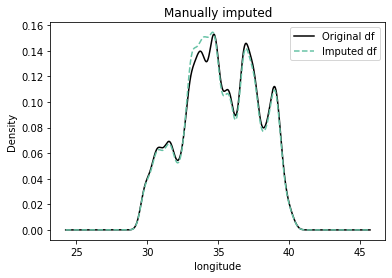

In [ ]:
# longitude 
# manually imputed longitude looks pretty good
impute_checker('longitude', train, 'Manually imputed')

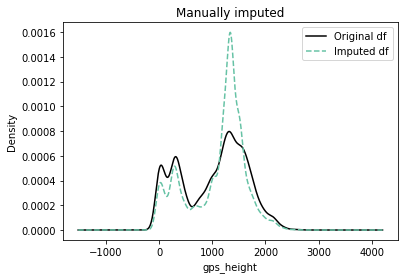

In [ ]:
# that doesn't look good
impute_checker('gps_height', train, 'Manually imputed')

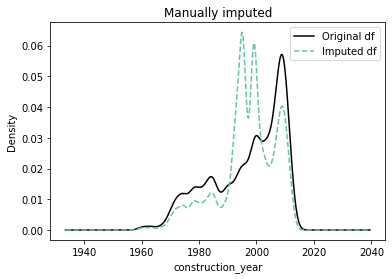

In [ ]:
#we can see an odd spike in the 90s
impute_checker('construction_year', train, 'Manually imputed')